In [52]:
import math
import torch
import ntwrk
from ntwrk.bayesopt import BayesOpt, expected_improvement, max_mean
import gpytorch
from gpytorch.kernels import RBFKernel
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
def true_func(x):
    return torch.sin(x) + 0.3 * torch.sin(3*x)

In [80]:
train_x = torch.rand(10) * 2 * math.pi
train_y = true_func(train_x)

In [162]:
test_x = torch.linspace(0, 2 * math.pi, 500)

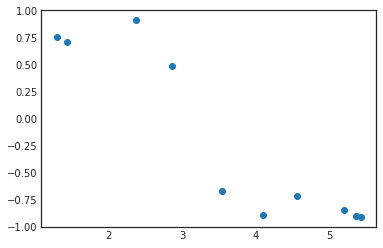

In [163]:
plt.scatter(train_x, train_y)
plt.show()

In [164]:
lh = gpytorch.likelihoods.GaussianLikelihood()
prior_model = ntwrk.bayesopt.Surrogate(None, None, lh, RBFKernel)

In [165]:
prior_model.eval();
lh.eval();

In [166]:
priors = prior_model(test_x).sample(sample_shape=torch.Size((5,))).squeeze()
prior_dist = lh(prior_model(test_x))
prior_mean = prior_dist.mean.detach()
prior_lower, prior_upper = prior_dist.confidence_region()

# priors = prior_dist.sample(sample_shape=torch.Size((5,))).squeeze()

/home/vagrant/workspace/gpytorch/gpytorch/utils/cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)


In [167]:
post_model = BayesOpt(train_x, train_y, RBFKernel, normalize=False)

In [168]:
post_model.train_surrogate(iters=500)

In [169]:
post_model.surrogate.eval();
post_model.surrogate_lh.eval();

In [170]:
posts = post_model.surrogate(test_x).sample(sample_shape=torch.Size((5,))).squeeze()
post_dist = post_model.surrogate_lh(post_model.surrogate((test_x)))
post_mean = post_dist.mean.detach()
post_lower, post_upper = post_dist.confidence_region()



/home/vagrant/workspace/gpytorch/gpytorch/utils/cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)


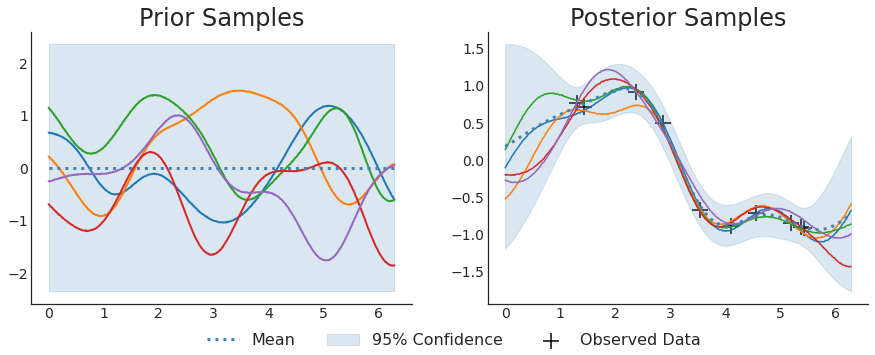

In [187]:
sns.set_style("white")
sns.color_palette("bright")

mean_color = "steelblue"

ax_fs = 16
title_fs = 24
leg_fs = 16
tick_fs = 14
lwd=2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(test_x, priors.t(), linewidth=lwd)
ax1.plot(test_x, prior_mean, linewidth=lwd+1, label="Mean", color=mean_color,
        linestyle=":")
ax1.fill_between(test_x, prior_lower.detach(), prior_upper.detach(), color=mean_color, label="95% Confidence",
                alpha=0.2)

ax1.tick_params("both", labelsize=tick_fs)
ax1.set_title("Prior Samples", fontsize=title_fs)


ax2.plot(test_x, posts.t())
ax2.scatter(train_x, train_y, color='k', marker="+", s=250, label="Observed Data")
# ax2.legend(fontsize=leg_fs)
ax2.tick_params("both", labelsize=tick_fs)
ax2.set_title("Posterior Samples", fontsize=title_fs)
ax2.plot(test_x, post_mean, linewidth=lwd+1, color=mean_color,
        linestyle=":")
ax2.fill_between(test_x, post_lower.detach(), post_upper.detach(), color=mean_color,
                alpha=0.2)


sns.despine()

fig.legend(loc='lower center', bbox_to_anchor=(0.42, -0.02), ncol=3, fontsize=leg_fs)
plt.savefig("./gp-plot.pdf", bbox_inches="tight")
plt.show()

In [102]:
test_x.shape

torch.Size([500])

In [101]:
posts.shape

torch.Size([5, 500])

In [188]:
torch.arange(1, 10)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])